More information [here](https://www.cdc.gov/brfss/annual_data/2024/summary_matrix_24.html)

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import XPThandler


file_path = 'data/LLCP2024.XPT' 

print("Merging data files together...")
XPThandler.merge_file(file_path)
print("Loading data... this may take a minute.")
df = pd.read_sas(file_path, format='xport')

targets = ["_MICHD", "_LTASTH1", "_DRDXAR2"]

print("Decoding byte strings...")
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(lambda x: x.str.decode('utf-8'))

print(f"Data Loaded Successfully! Shape: {df.shape}")
print(df.head())


Merging data files together...
Loading data... this may take a minute.
Decoding byte strings...
Data Loaded Successfully! Shape: (457670, 301)
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     2.0  02282024     02   28  2024    1100.0  2024000001   
1     1.0     2.0  02212024     02   21  2024    1100.0  2024000002   
2     1.0     2.0  02212024     02   21  2024    1100.0  2024000003   
3     1.0     2.0  02282024     02   28  2024    1100.0  2024000004   
4     1.0     2.0  02212024     02   21  2024    1100.0  2024000005   

           _PSU  CTELENM1  ...  _LCSCTSN  _LCSPSTF  DRNKANY6      DROCDY4_  \
0  2.024000e+09       1.0  ...       NaN       9.0       2.0  5.397605e-79   
1  2.024000e+09       1.0  ...       4.0       9.0       2.0  5.397605e-79   
2  2.024000e+09       1.0  ...       4.0       2.0       1.0  1.000000e+02   
3  2.024000e+09       1.0  ...       NaN       9.0       2.0  5.397605e-79   
4  2.024000e+09       1.0  ...       3.0

In [30]:
to_drop = ["_STATE", "FMONTH", "IDATE", "IDAY", "IMONTH", "IYEAR", "DISPCODE", "SEQNO"]
df = df.drop(columns=to_drop, errors='ignore')
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


_PSU:
_PSU
2.024000e+09    53
2.024000e+09    53
2.024000e+09    53
2.024000e+09    53
2.024000e+09    53
                ..
2.024044e+09     1
2.024044e+09     1
2.024044e+09     1
2.024044e+09     1
2.024044e+09     1
Name: count, Length: 43913, dtype: int64

CTELENM1:
CTELENM1
1.0    81730
Name: count, dtype: int64

PVTRESD1:
PVTRESD1
1.0    81716
2.0       14
Name: count, dtype: int64

COLGHOUS:
COLGHOUS
1.0    14
Name: count, dtype: int64

STATERE1:
STATERE1
1.0    81730
Name: count, dtype: int64

CELPHON1:
CELPHON1
2.0    81730
Name: count, dtype: int64

LADULT1:
LADULT1
1.0    81580
2.0      150
Name: count, dtype: int64

NUMADULT:
NUMADULT
2.0     37944
1.0     34525
3.0      6232
4.0      2029
5.0       522
6.0       165
18.0      150
7.0        62
8.0        30
10.0       13
99.0       12
9.0        11
12.0       10
13.0        6
14.0        5
15.0        1
11.0        1
Name: count, dtype: int64

RESPSLC1:
RESPSLC1
1.0    45160
2.0     2033
Name: count, dtype: int64

LANDSE

In [31]:
to_drop = ["_STATE", "FMONTH", "IDATE", "IDAY", "IMONTH", "IYEAR", "DISPCODE", "SEQNO", "RCSXBRTH", "RCSGEND1", "COLGHOUS", "CSRVCTL2", "ICFQSTVR",
           "HEATTBCO", "POORHLTH"]
df = df.drop(columns=to_drop, errors='ignore')
print("OBJECT COLUMNS:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} ({df[col].nunique()} unique):")
    print(df[col].value_counts(dropna=False).head(10))

# Missing values
print("\n\nMISSING VALUES:")
nulls = df.isna().sum()
print(nulls[nulls > 0].sort_values(ascending=False))
df = df.dropna(thresh=len(df)*0.2, axis=1)

OBJECT COLUMNS:


MISSING VALUES:
CCLGHOUS    456244
HPVDSHT     455650
CSRVINST    455045
NOBCUSE8    454899
LASTSIG4    454443
             ...  
CVDINFR4         2
CHECKUP1         2
LASTDEN4         2
_CHLDCNT         1
DROCDY4_         1
Length: 242, dtype: int64


In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_dum = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=float)
print(df_dum.head())

           _PSU  SAFETIME  CTELNUM1  CELLFON5  CADULT1  CELLSEX3  PVTRESD3  \
0  2.024000e+09       NaN       NaN       NaN      NaN       NaN       NaN   
1  2.024000e+09       NaN       NaN       NaN      NaN       NaN       NaN   
2  2.024000e+09       NaN       NaN       NaN      NaN       NaN       NaN   
3  2.024000e+09       NaN       NaN       NaN      NaN       NaN       NaN   
4  2.024000e+09       NaN       NaN       NaN      NaN       NaN       NaN   

   CSTATE1  LANDLINE  HHADULT  ...  _LCSCTSN  _LCSPSTF  DRNKANY6  \
0      NaN       NaN      NaN  ...       NaN       9.0       2.0   
1      NaN       NaN      NaN  ...       4.0       9.0       2.0   
2      NaN       NaN      NaN  ...       4.0       2.0       1.0   
3      NaN       NaN      NaN  ...       NaN       9.0       2.0   
4      NaN       NaN      NaN  ...       3.0       9.0       2.0   

       DROCDY4_  _RFBING6      _DRNKWK3  _RFDRHV9  _FLSHOT7  _PNEUMO3  \
0  5.397605e-79       1.0  5.397605e-79       1.0

In [33]:
print(df.describe())

               _PSU  SAFETIME  CTELNUM1  CELLFON5   CADULT1       CELLSEX3  \
count  4.576700e+05  375940.0  375940.0  375939.0  375938.0  372357.000000   
mean   2.024007e+09       1.0       1.0       1.0       1.0       1.517544   
std    7.488291e+03       0.0       0.0       0.0       0.0       0.607708   
min    2.024000e+09       1.0       1.0       1.0       1.0       1.000000   
25%    2.024002e+09       1.0       1.0       1.0       1.0       1.000000   
50%    2.024005e+09       1.0       1.0       1.0       1.0       2.000000   
75%    2.024008e+09       1.0       1.0       1.0       1.0       2.000000   
max    2.024044e+09       1.0       1.0       1.0       1.0       9.000000   

            PVTRESD3        CSTATE1       LANDLINE       HHADULT  ...  \
count  375940.000000  375938.000000  375939.000000  3.757090e+05  ...   
mean        1.003793       1.054477       1.836864  2.982979e+00  ...   
std         0.061472       0.226957       0.504580  8.654773e+00  ...   
min  

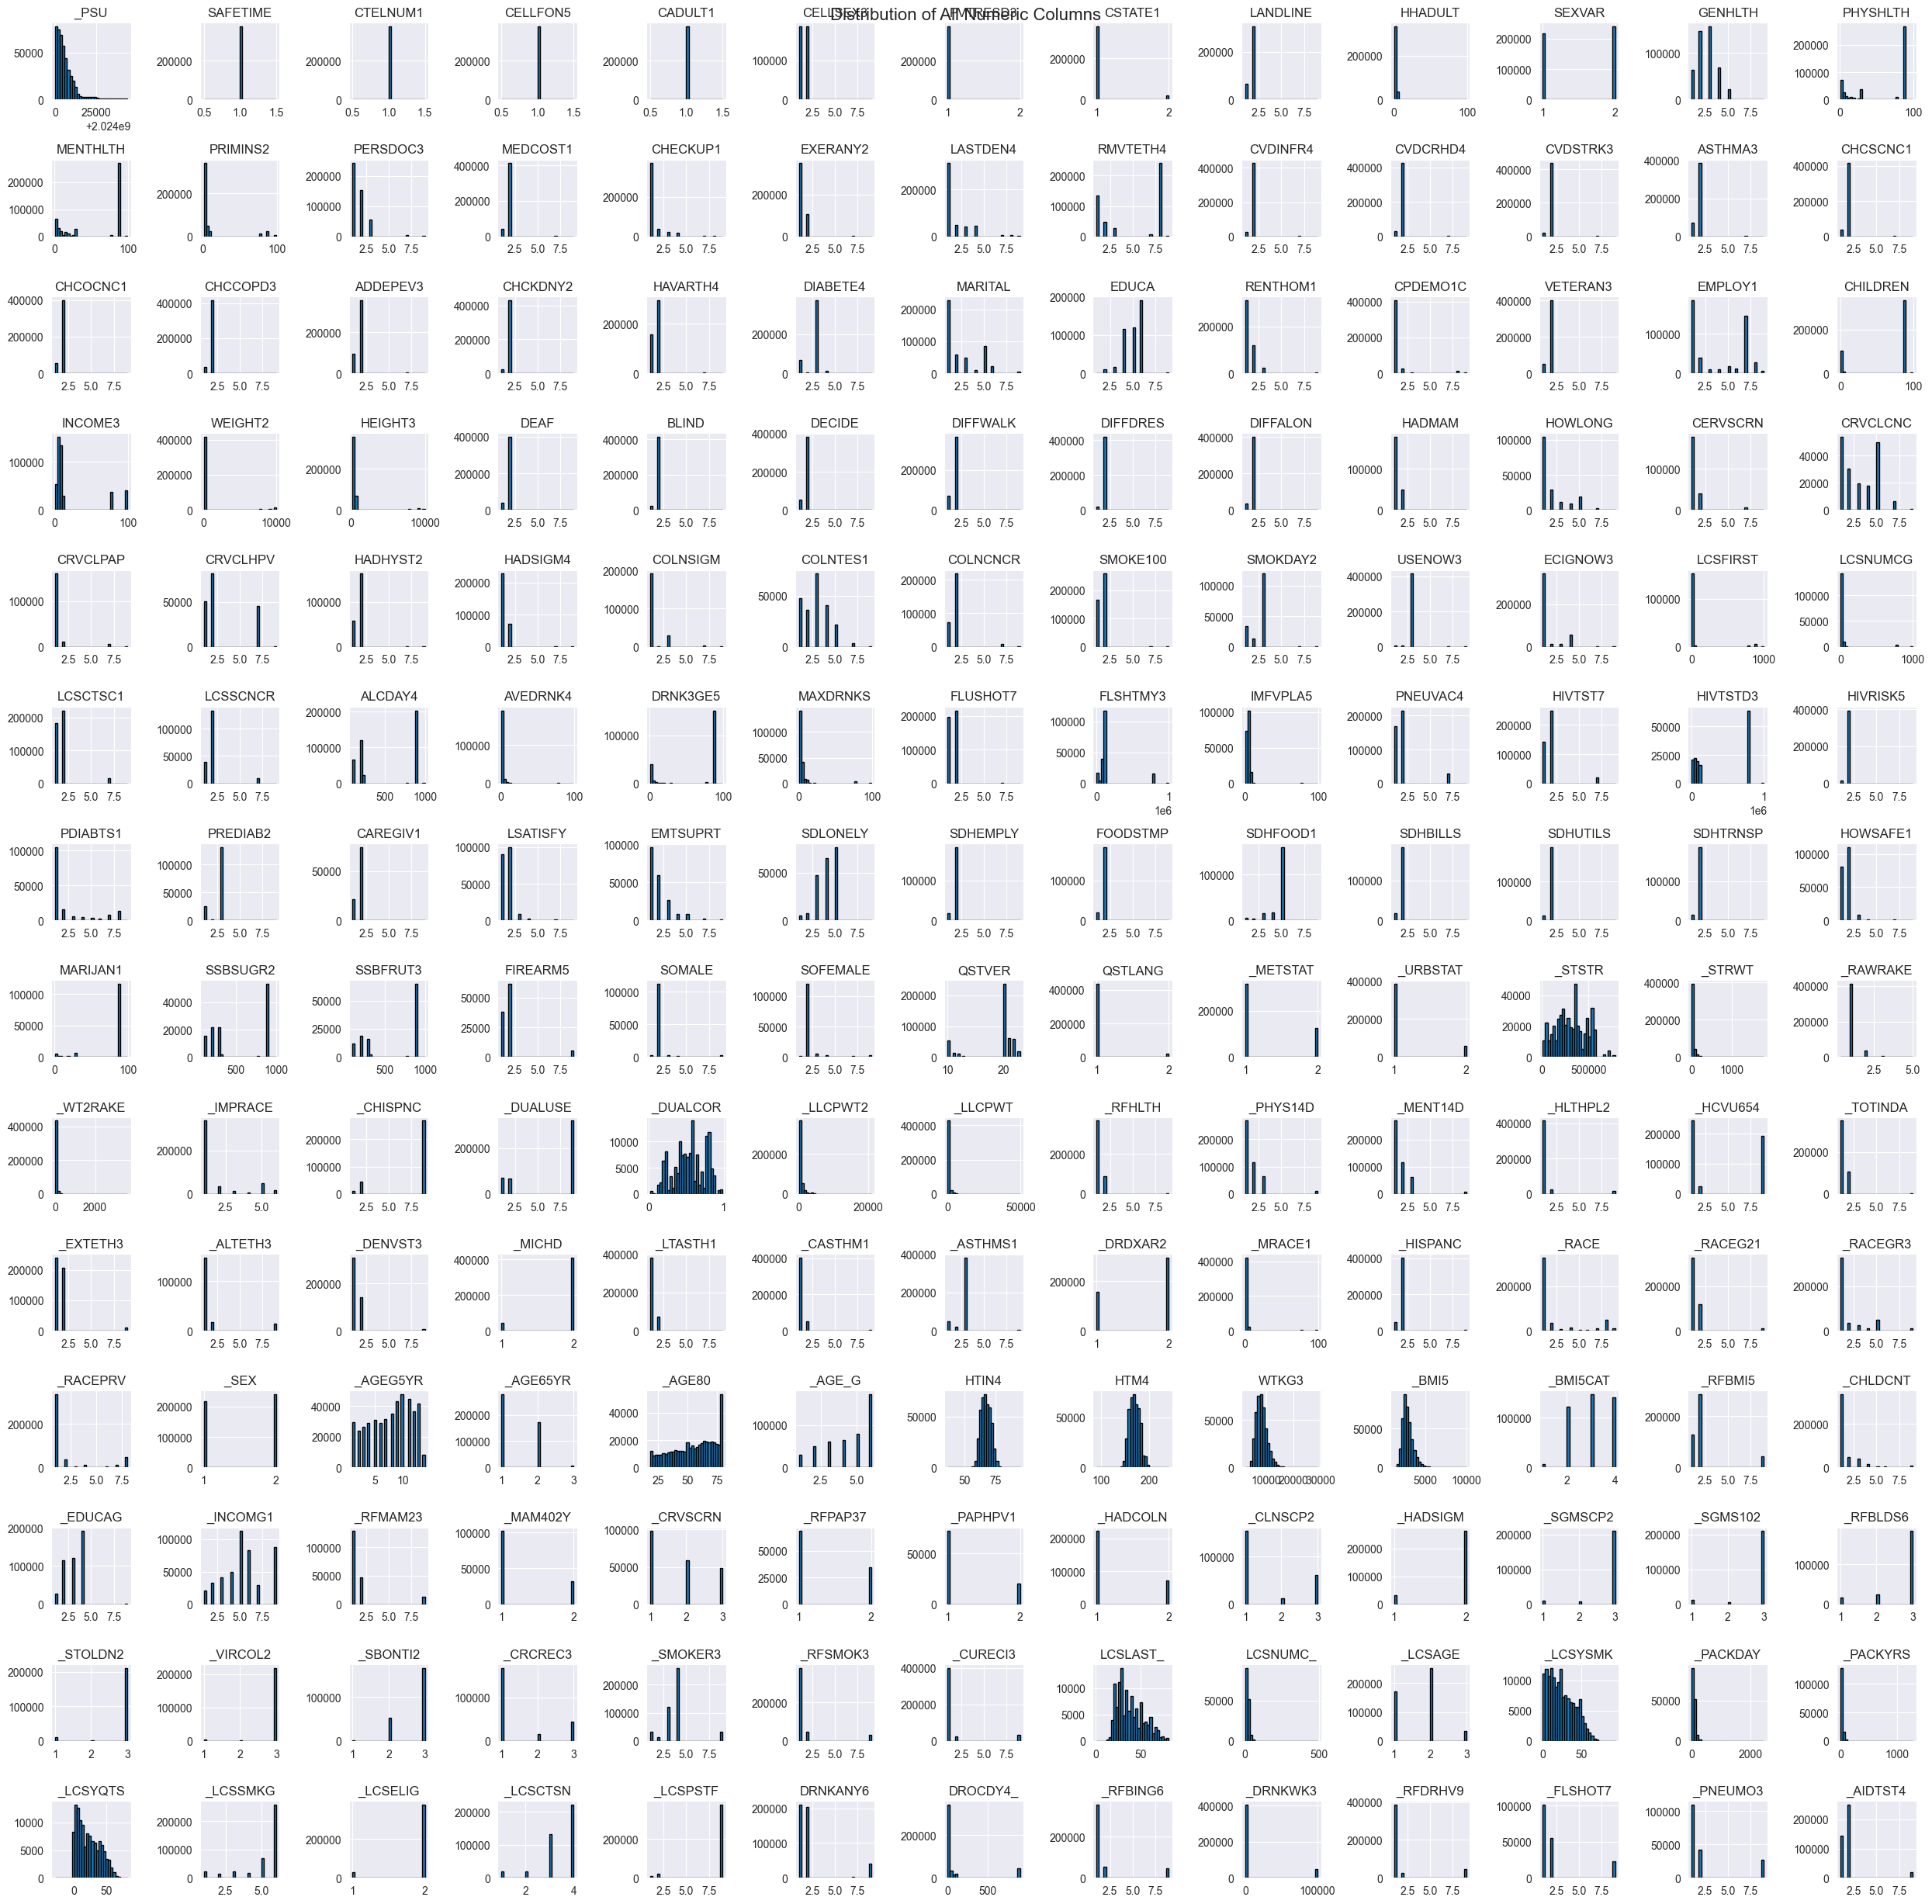

In [36]:
df_dum.hist(
    bins=30,        # number of bins per histogram
    figsize=(25, 25),  # overall figure size
    edgecolor='black'  # add border for clarity
)

plt.suptitle("Distribution of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

In [38]:
corr = df_dum.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(182,182))
sns.heatmap(
    corr,
    annot=False,        # show correlation values
    fmt=".1f",         # format to 2 decimals
    cmap="coolwarm",   # color palette
    center=0,          # center colormap at 0
    linewidths=0.5     # lines between cells
)

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

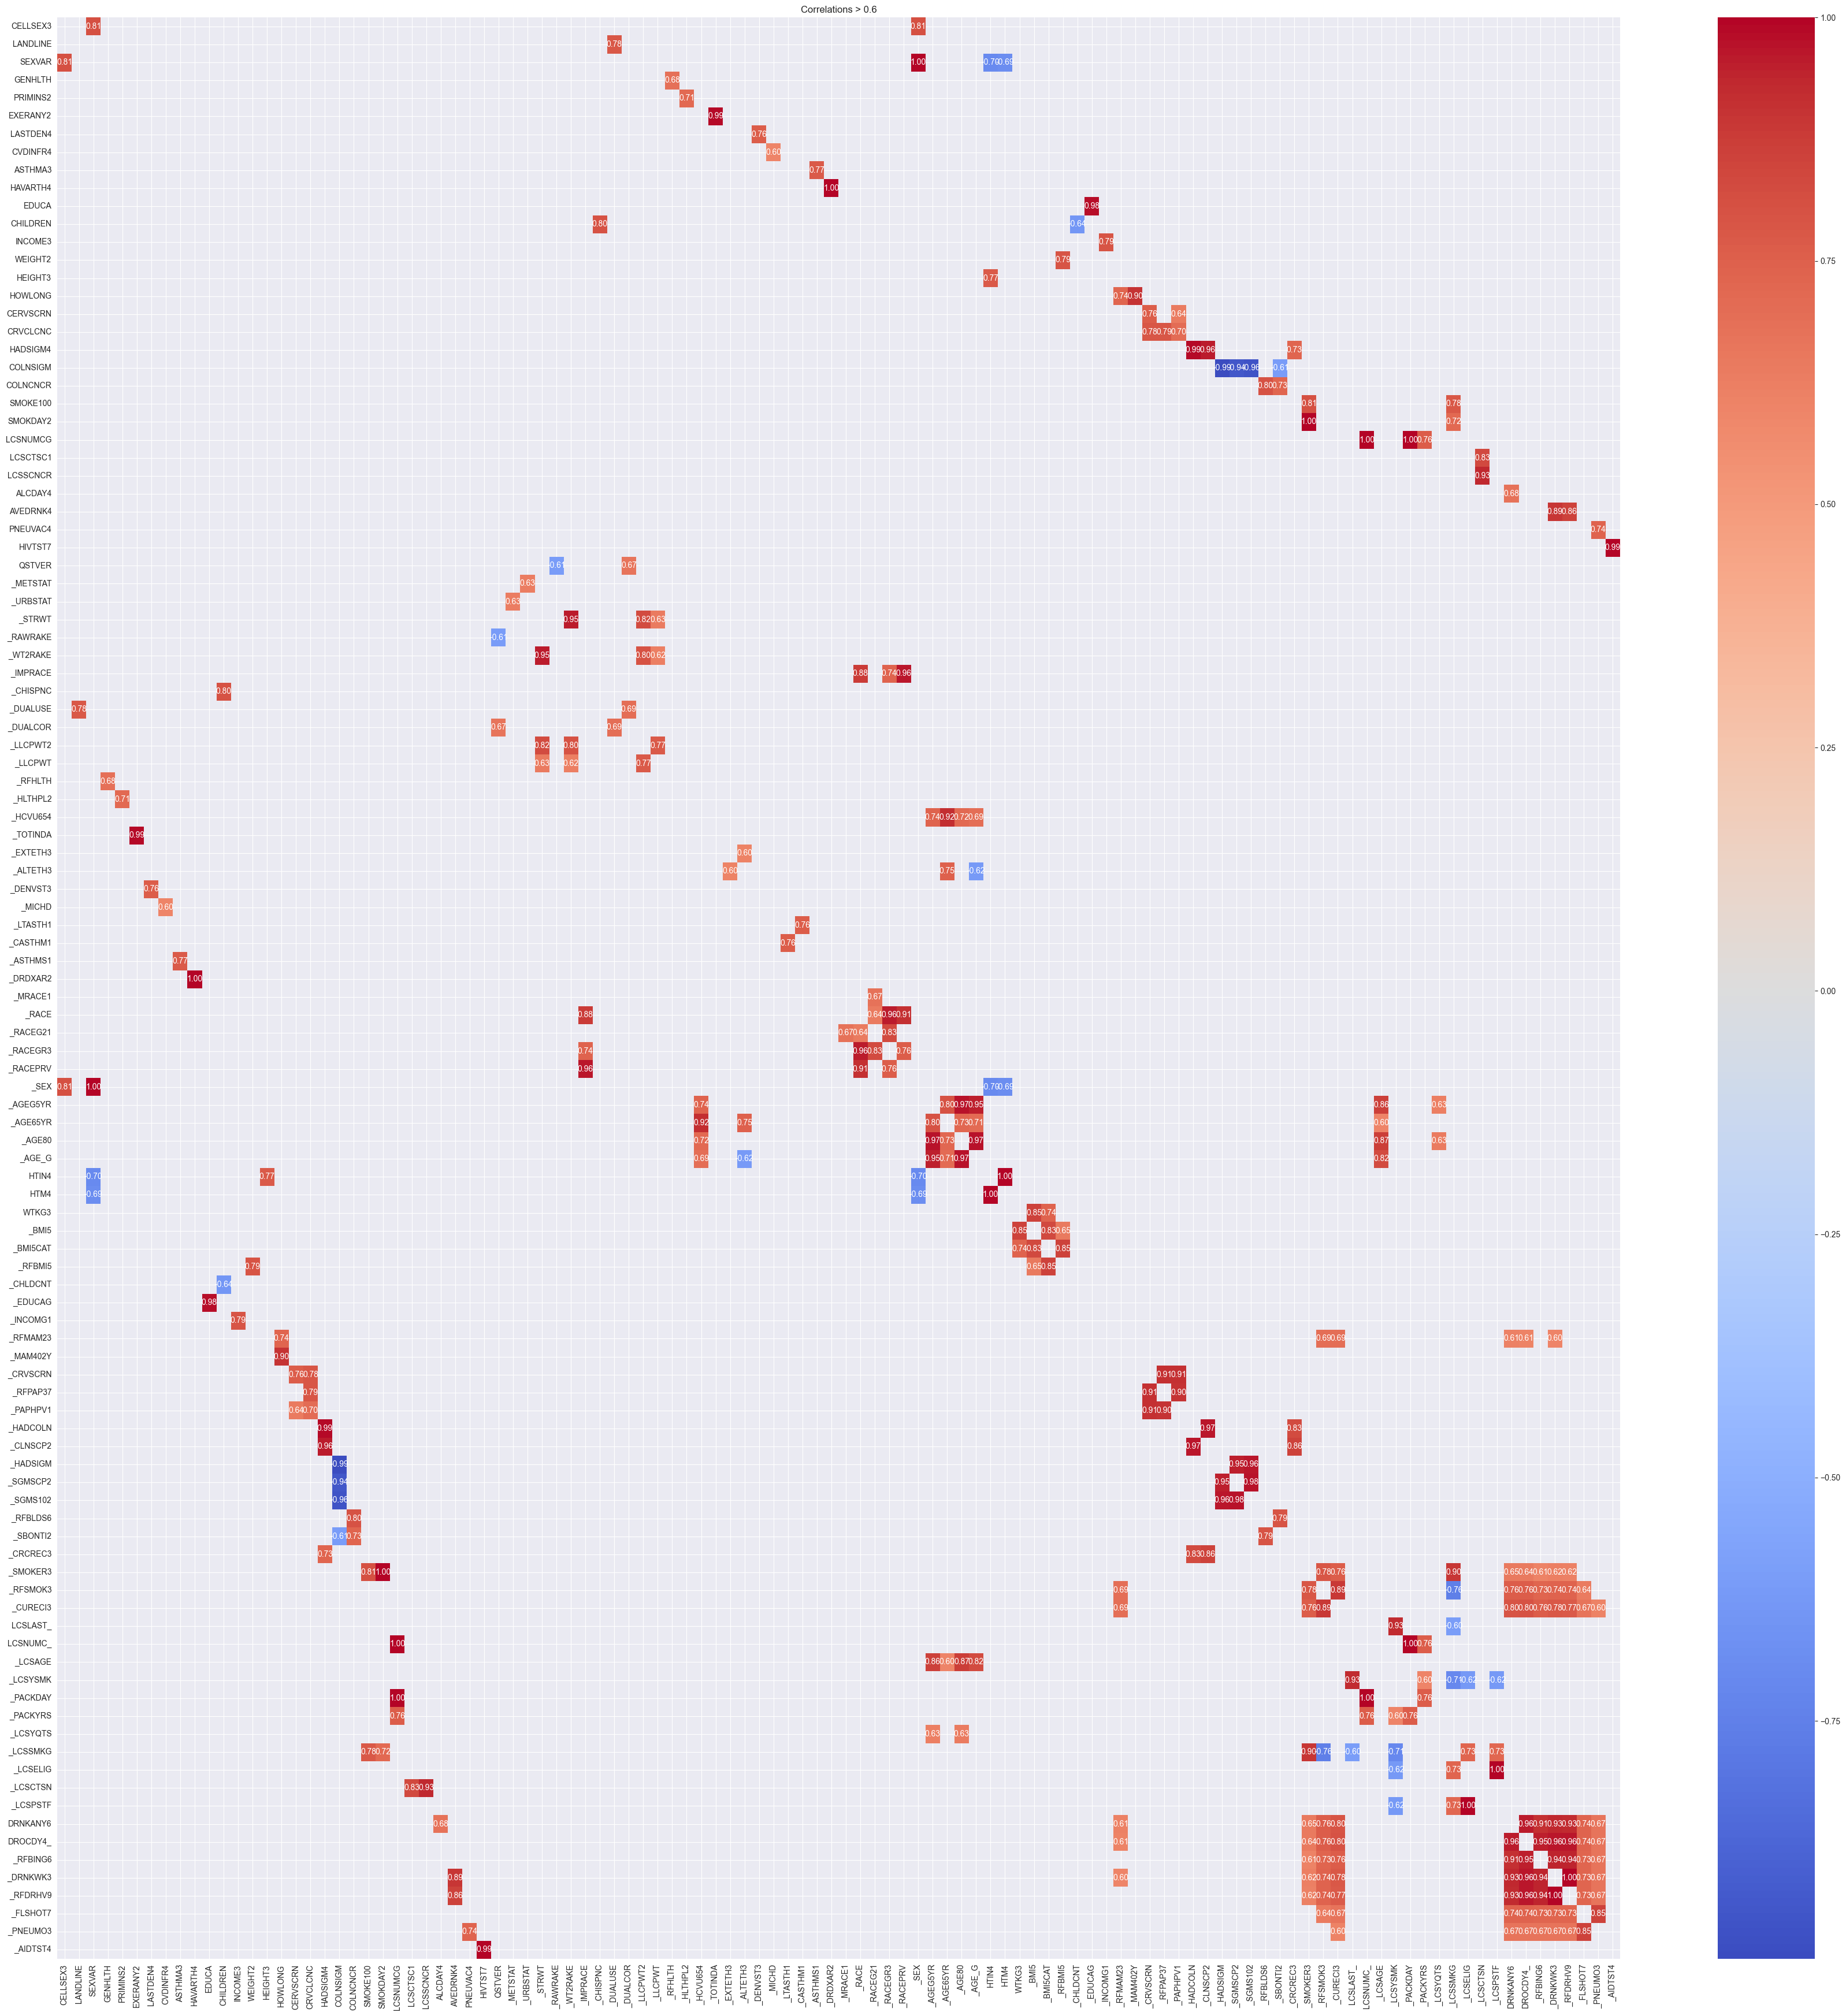

In [49]:
threshold = 0.6
mask_strong = (abs(corr) >= threshold) & (corr != 1.0)
cols_with_corr = mask_strong.any(axis=0)
corr_filtered = corr.loc[cols_with_corr, cols_with_corr]

# Mask weak correlations for display
mask = (abs(corr_filtered) < threshold) | (corr_filtered == 1.0)

plt.figure(figsize=(35, 35))
sns.heatmap(corr_filtered, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title(f'Correlations > {threshold}')
plt.tight_layout()
plt.show()

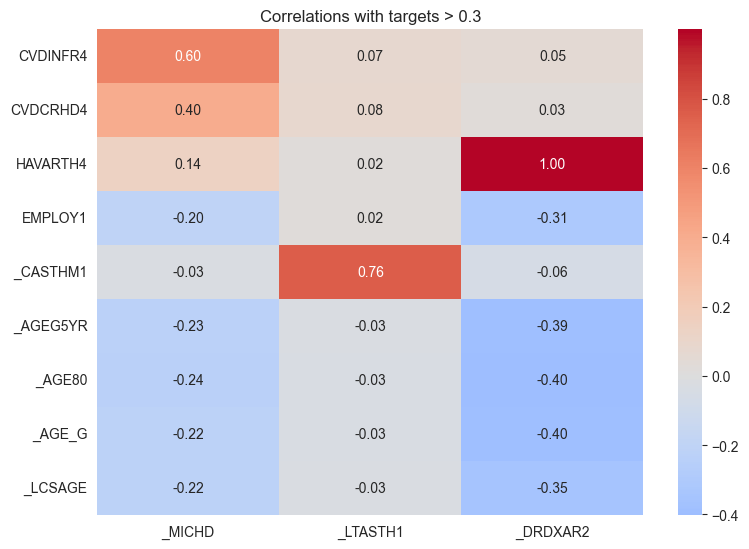

In [52]:
threshold = 0.3
corr = df_dum.corr()[targets]
corr = corr.drop(index=targets, errors='ignore')  # remove targets from rows

# Filter rows with at least one correlation above threshold
rows_with_corr = (abs(corr) >= threshold).any(axis=1)
corr_filtered = corr.loc[rows_with_corr]

plt.figure(figsize=(8, len(corr_filtered) * 0.4 + 2))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title(f'Correlations with targets > {threshold}')
plt.tight_layout()
plt.show()